#### In Data Analysis We will Analyze To Find out the below stuff
1. Check for imbalanced data in case of classfication
2. General information about the data
1. Missing Values
2. Numerical Variables (Discrete)
3. Continuous Variables (Continuous)
4. Categorical Variables and their cardinality
5. Outliers

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [15]:
dataset = pd.read_csv('bengaluru_house_prices.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### 1. General information about the data.

* There are 13320 records and 9 features.

In [16]:
dataset.shape

(13320, 9)

* General information about the data. We can see that the df has some missing values.

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


* Show same descriptive statistisc about each feature.

In [18]:
dataset.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### 2. Missing Values

In [19]:
if dataset.isna().sum().any():
    print('There are missing values')
else:
    print('There are no missing values')

There are missing values


In [20]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

for feature in features_with_na:
    print(f'{feature} - {np.round(dataset[feature].isnull().mean() * 100, 4)}% - {dataset[feature].isnull().sum()}')

location - 0.0075% - 1
size - 0.1201% - 16
society - 41.3063% - 5502
bath - 0.548% - 73
balcony - 4.5721% - 609


**Since society has many missing values, we need to find the relationship between missing values and Price.**

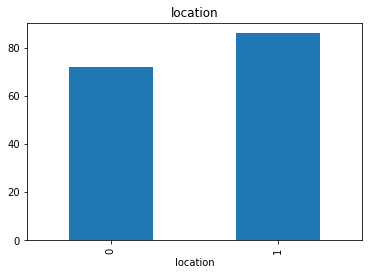

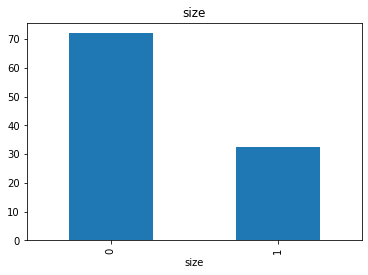

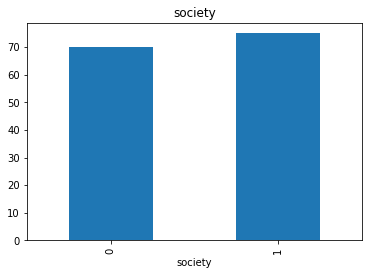

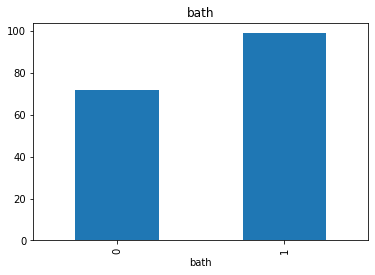

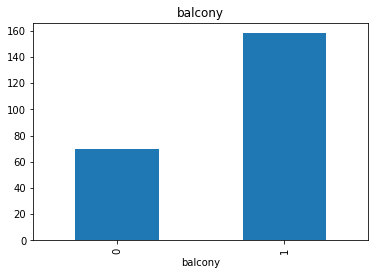

In [21]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

* It looks like there is no visible relationship between missing values in society and price.

### 3. Numerical Discrete Variables

In [22]:
dataset.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [23]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [24]:
# convert total_sqft to numerical

def convert_sqft_to_num(x):

    try:
        float_x = float(x) # case where x is of type '234.3' which means we can directly covert to float
        return float_x
        
    except:
        
        tokens = x.split('-') 
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))/2  # tokens are in string format so we must convert to float to calculate mean
         # else(cases where we dont have a range min-max the length of tokens = 1 since those values do not contain '-')
        tokens = x.split(' ') 
        if len(tokens) == 2: # cases '132Sq. Yards' or '716Sq. Meter'
            if tokens[1] == 'Yards':  # case '132Sq. Yards'  
                yards = float(tokens[0][:-3])
                sqft = yards / 0.11111111
                return sqft
            elif tokens[1] == 'Meter':  # case '716Sq. Meter'
                meters = float(tokens[0][:-3])
                sqft = meters / 0.09290304
                return sqft
    
        else:  # cases '6Acres', '24Guntha', '3Cents', '1Grounds'
            if 'Acres' in x:
                tokens = x.split('Acres')
                acres = float(tokens[0])
                sqft = acres / 0.00002296
                return sqft
        
            elif 'Guntha' in x:
                tokens = x.split('Guntha')
                guntha = float(tokens[0])
                sqft = guntha / 0.00000003587
                return sqft
        
            elif 'Cents' in x:
                tokens = x.split('Cents')
                cents = float(tokens[0])
                sqft = cents / 0.0023
                return sqft
        
            elif 'Grounds' in x:
                tokens = x.split('Grounds')
                grounds = float(tokens[0])
                sqft = grounds / 0.00041666666666667
                return sqft
    
    
        return None

In [25]:
dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft_to_num)

In [28]:
dataset.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [33]:
# convert size to numerical
dataset['size'] = dataset['size'].fillna(dataset['size'].mode()[0])
dataset['size'] = dataset['size'].apply(lambda x: int(x.split(' ')[0]))

In [34]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  5
['size', 'total_sqft', 'bath', 'balcony', 'price']


In [35]:
dataset[numerical_features]

,size,total_sqft,bath,balcony,price
0,2,1056.0,2.0,1.0,39.07
1,4,2600.0,5.0,3.0,120.00
2,3,1440.0,2.0,3.0,62.00
3,3,1521.0,3.0,1.0,95.00
4,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...
13315,5,3453.0,4.0,0.0,231.00
13316,4,3600.0,5.0,NaN,400.00
13317,2,1141.0,2.0,1.0,60.00
13318,4,4689.0,4.0,1.0,488.00


In [36]:
# if a features has less than 25 categories i will consider as discrete features

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]

print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 3
['size', 'bath', 'balcony']


**Relationship between discrete features and target feature price.**

* If price has many outliers we use the median as a value that represents the price column since median is not affected by outliers, otherwise mean.

* Price feature has many outliers based on IQR so i will use median to represent the price column.

<AxesSubplot:xlabel='price'>

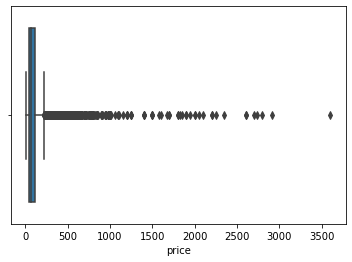

In [37]:
sns.boxplot(x='price', data=dataset)

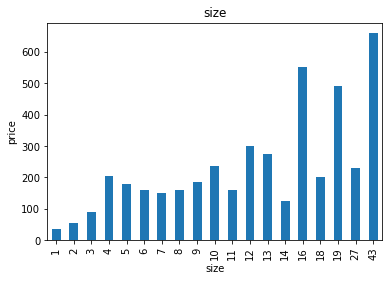

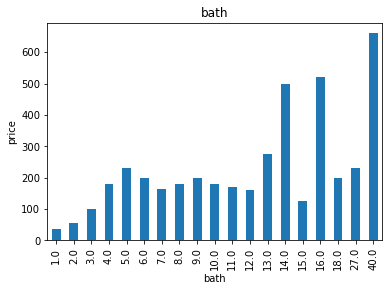

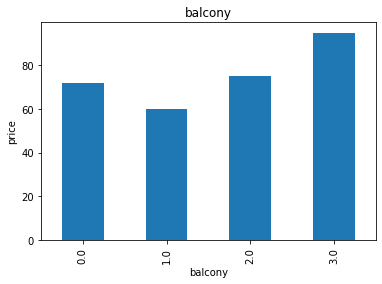

In [38]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [ ]:
## other plots

### 4. Numerical Continuous Features

In [39]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 2
['total_sqft', 'price']


**Show the distribution (histogram) of continuous features.**

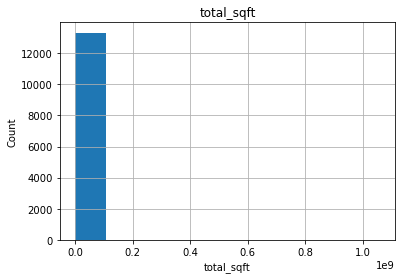

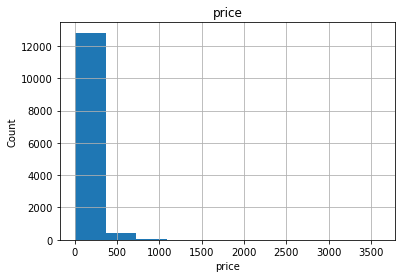

In [41]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Plot relationship beween continuous feature and target feature price.**

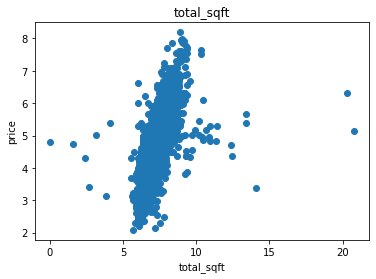

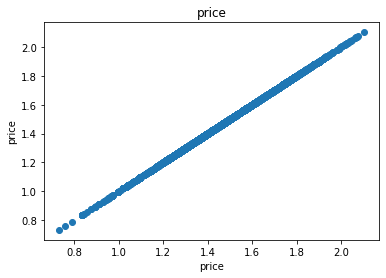

In [42]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

**When total_sqft increases price increases.**

### 5. Categorical Features

In [44]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O' and
                      feature not in ['size', 'total_sqft']]

print(len(categorical_features))
print(categorical_features)

4
['area_type', 'availability', 'location', 'society']


In [45]:
# nr of categories in each categorical features

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is area_type and number of categories are 4
The feature is availability and number of categories are 81
The feature is location and number of categories are 1306
The feature is society and number of categories are 2689


**Plot relationship between categorical features and target feature price**

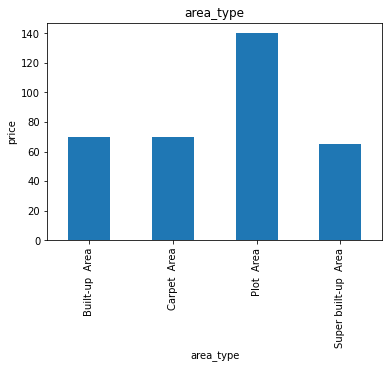

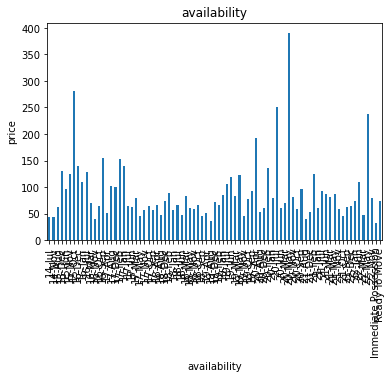

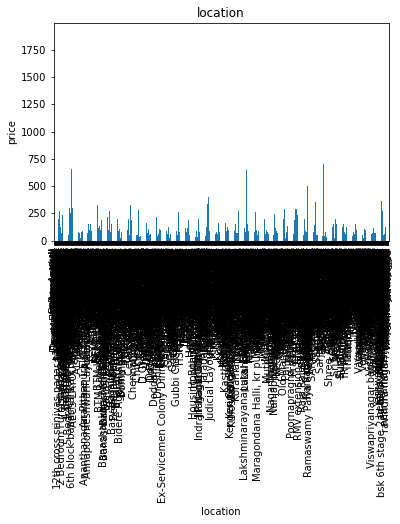

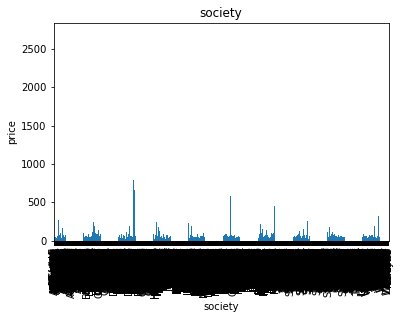

In [46]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

* Since in area_type features when the category is Built-Up Area, Carpet Area and Super Built Up Area the price is similar and when category is Plot Area the price is higher, we should encode these 3 categories with the same value for example we can use mean encoding. 

### 5. Outliers

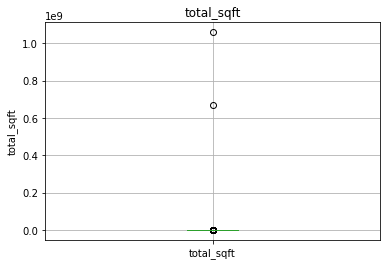

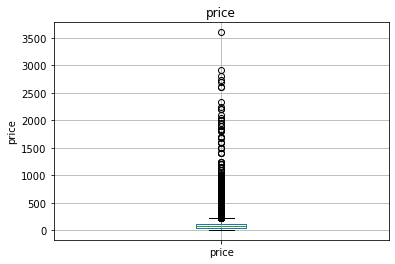

In [47]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

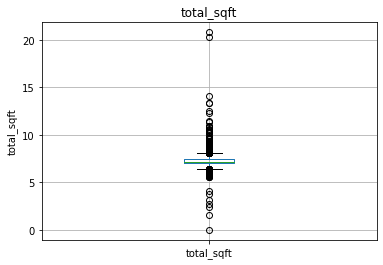

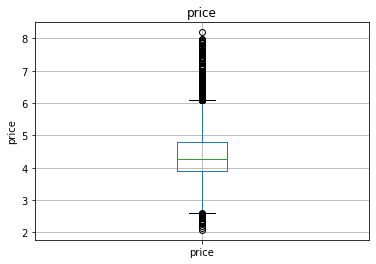

In [48]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()